<a href="https://colab.research.google.com/github/jaspresso/DQN-Project/blob/main/%EA%B0%95%ED%99%94%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install gymnasium
!pip install pygame

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 16.1 MB/s eta 0:00:00


In [6]:
import gymnasium as gym
import time

env = gym.make('CartPole-v1', render_mode="human")
# env = gym.make('FrozenLake-v1', render_mode="human")
## Fronzenlake-1
# 0: Move left
# 1: Move down
# 2: Move right
# 3: Move up

# Reach goal: +1
# Reach hole: 0
# Reach frozen: 0

obs, info = env.reset(seed=42)

# 1000번 실행
for _ in range(10000):
    action = env.action_space.sample()
    # terminated : environment 종료
    # truncated : episode 종료
    obs, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        time.sleep(0.5)
        obs, info = env.reset()

env.close()


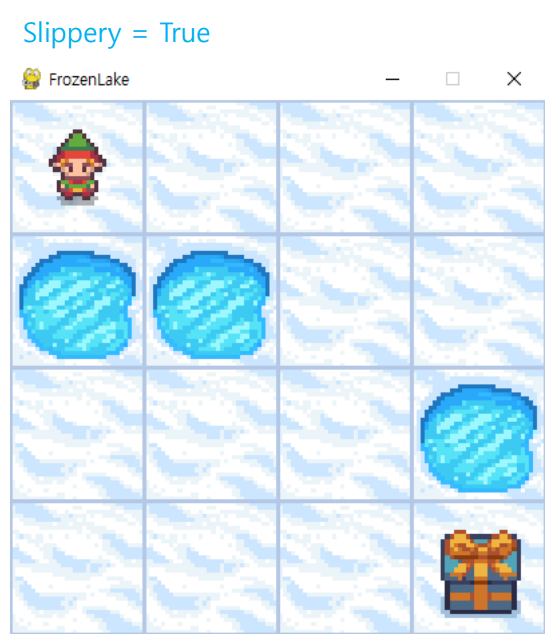

In [4]:
import gymnasium as gym
import pygame
import numpy as np

## button setting, 대문자는 상수로 쓰겠다는 의미
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

## Pygame key
arrow_keys = {
    pygame.K_UP : UP,
    pygame.K_DOWN : DOWN,
    pygame.K_RIGHT : RIGHT,
    pygame.K_LEFT : LEFT
}


## ENV import
env = gym.make("FrozenLake-v1",
               render_mode = "rgb_array",
               desc = None,
               map_name = "4x4",
               is_slippery = False)

env.reset()


(0, {'prob': 1})

In [5]:
## Init pygame
pygame.init()
screen = pygame.display.set_mode((400, 400))
pygame.display.set_caption("FrozenLake-v1")


In [6]:
## FrozenLake
running = True

while running:
  for event in pygame.event.get(): ## event 감지
    if event.type == pygame.QUIT:
      running = False
      break

    elif event.type == pygame.KEYDOWN:
        if event.key in arrow_keys:
            action = arrow_keys[event.key] # 0, 1, 2, 3
            print("Action: ", action)
            state, reward, terminated, truncated, _ = env.step(action)

            print("state = {0}, reward = {1}, terminated = {2}".format(
                state, reward, terminated))

            if terminated or truncated:
              print("Finished with reward: {}".format(reward))
              running = False
              break

pygame.quit()
env.close()



KeyboardInterrupt: 